In [1]:
import numpy as np
from docplex.cp.model import CpoModel
import matplotlib.pyplot as plt
import networkx as nx

import graph as gr
import dijkstra as dk
import methods as meth

Green vertices are in S, grey vertices are not in S:


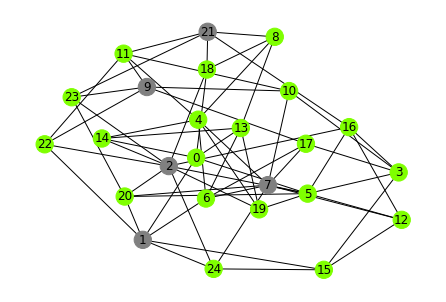

In [11]:
#the 2 following lines can be changed
N = 25
mean_edges_per_vertex = 4

graph = gr.generate_random_graph(N, mean_edges_per_vertex, 1, 1)

V, adj_mat = meth.compute_V_adjmat(graph)

highest_deg = np.max(np.sum(adj_mat, axis = 1))
all_deg = np.sum(adj_mat, axis = 1)

color_map = ['gray']*N

name_edge, all_edges = meth.compute_edges(V, adj_mat)

A = meth.powers_A(adj_mat)

taille_PCC = meth.compute_taille_pcc(V, A)

PCC, rev_PCC = meth.compute_PCC_revPCC(V, graph, taille_PCC, all_edges, name_edge)

ksi = meth.chromatic_number(adj_mat)

mdl = meth.model(adj_mat, all_edges, PCC, rev_PCC)
msol = mdl.solve(TimeLimit = 60, LogVerbosity = 'Quiet')
solution_x = [msol.get_value(f"x_{i}") for i in range(N)]

print("Green vertices are in S, grey vertices are not in S:")

for i in range(N):
    if solution_x[i]==1:
        color_map[i] = 'chartreuse'

G = nx.from_numpy_matrix(np.matrix(adj_mat))
fig1 = plt.figure(1)
nx.draw(G, node_color = color_map, with_labels=True)
plt.savefig("Big_Example2.pdf")
plt.show()